In [7]:
import pandas as pd
import numpy as np


In [9]:
data = {
    'ord_no': [70001.0, np.nan, 70002.0, 70004.0, np.nan, 70005.0, 
               np.nan, 70010.0, 70003.0, 70012.0, np.nan, 70013.0],
    'purch_amt': [150.50, 270.65, 65.26, 110.50, 948.50, 2400.60, 
                  5760.00, 1983.43, 2480.40, 250.45, 75.29, 3045.60],
    'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', 
                 '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', 
                 '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 
                    3003, 3002, 3001, 3001],
    'salesman_id': [5002.0, 5003.0, 5001.0, np.nan, 5002.0, 5001.0, 
                    5001.0, np.nan, 5003.0, 5002.0, 5003.0, np.nan]
}

#### 1. Write a Pandas program to detect missing values of a given DataFrame. Display True or False.

In [37]:
df = pd.DataFrame(data)
df.isna()

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,False,False,False,False,False
1,True,False,False,False,False
2,False,False,True,False,False
3,False,False,False,False,True
4,True,False,False,False,False
5,False,False,False,False,False
6,True,False,False,False,False
7,False,False,False,False,True
8,False,False,False,False,False
9,False,False,False,False,False


#### 2. Write a Pandas program to identify the column(s) of a given DataFrame which have at least one missing value.

In [56]:
print(df.columns[df.isna().any()])

Index(['ord_no', 'ord_date', 'salesman_id'], dtype='object')


In [58]:
print(df.columns[df.isna().any()].tolist())

['ord_no', 'ord_date', 'salesman_id']


#### 3.Write a Pandas program to count the number of missing values in each column of a given DataFrame.

In [64]:
df.isna().sum()

ord_no         4
purch_amt      0
ord_date       1
customer_id    0
salesman_id    3
dtype: int64

#### 4. Write a Pandas program to find and replace the missing values in a given DataFrame which do not have any valuable information.

In [75]:
# replacing all missing values with 
df.replace(np.nan, 'x')

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,x,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,x,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,x
4,x,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,x,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,x
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


In [79]:
# doing forward fill in missing values
df.ffill(inplace = True)

In [81]:
df

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,70001.0,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,2012-09-10,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,5001.0
4,70004.0,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,70005.0,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,5001.0
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


#### 5. Write a Pandas program to drop the rows where at least one element is missing in a given DataFrame.

In [84]:
df = pd.DataFrame(data)

In [90]:
df.dropna()

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


#### 6. Write a Pandas program to drop the columns where at least one element is missing in a given DataFrame.

In [101]:
df.dropna(axis = 1)

,purch_amt,customer_id
0,150.50,3002
1,270.65,3001
2,65.26,3001
3,110.50,3003
4,948.50,3002
5,2400.60,3001
6,5760.00,3001
7,1983.43,3004
8,2480.40,3003
9,250.45,3002


In [103]:
# df.drop(df.columns[df.isna().any()].tolist(), axis = 1)

#### 7. Write a Pandas program to drop the rows where all elements are missing in a given DataFrame.

In [106]:
df.dropna(how = 'all')

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,2012-10-05,3002,5002.0
1,NaN,270.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,3001,5001.0
3,70004.0,110.50,2012-08-17,3003,NaN
4,NaN,948.50,2012-09-10,3002,5002.0
5,70005.0,2400.60,2012-07-27,3001,5001.0
6,NaN,5760.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,2012-10-10,3004,NaN
8,70003.0,2480.40,2012-10-10,3003,5003.0
9,70012.0,250.45,2012-06-27,3002,5002.0


#### 8. Write a Pandas program to keep the rows with at least 2 NaN values in a given DataFrame.

In [117]:
data = {
    'ord_no': [70001.0, np.nan, 70002.0, np.nan, np.nan, 70005.0],
    'purch_amt': [150.50, np.nan, np.nan, 110.50, np.nan, 2400.60],
    'ord_date': [np.nan, '2012-09-10', np.nan, '2012-08-17', np.nan, '2012-07-27'],
    'customer_id': [3002, 3001, np.nan, np.nan, np.nan, 3001],
    'salesman_id': [np.nan, 5003.0, np.nan, np.nan, 5002.0, 5001.0]
}
df = pd.DataFrame(data)

In [121]:
df1 = df[df.isna().sum(axis = 1) > 1]
df1

,ord_no,purch_amt,ord_date,customer_id,salesman_id
0,70001.0,150.5,NaN,3002.0,NaN
1,NaN,NaN,2012-09-10,3001.0,5003.0
2,70002.0,NaN,NaN,NaN,NaN
3,NaN,110.5,2012-08-17,NaN,NaN
4,NaN,NaN,NaN,NaN,5002.0


#### 9. Write a Pandas program to drop those rows from a given DataFrame in which specific columns have missing values.

In [127]:
df.dropna(subset=['ord_no', 'ord_date'])

,ord_no,purch_amt,ord_date,customer_id,salesman_id
5,70005.0,2400.6,2012-07-27,3001.0,5001.0


#### 10. Write a Pandas program to keep the valid entries of a given DataFrame.

In [129]:
data = {
    'ord_no': [np.nan, np.nan, 70002.0, np.nan, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, np.nan],
    'purch_amt': [np.nan, 270.65, 65.26, np.nan, 948.50, 2400.60, 5760.00, 1983.43, 2480.40, 250.45, 75.29, np.nan],
    'ord_date': [np.nan, '2012-09-10', np.nan, np.nan, '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', np.nan],
    'customer_id': [np.nan, 3001.0, 3001.0, np.nan, 3002.0, 3001.0, 3001.0, 3004.0, 3003.0, 3002.0, 3001.0, np.nan]
}


df = pd.DataFrame(data)

In [131]:
df.dropna()

,ord_no,purch_amt,ord_date,customer_id
5,70005.0,2400.60,2012-07-27,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


#### 11. Write a Pandas program to calculate the total number of missing values in a DataFrame.

In [134]:
df.isna().sum().sum()

17

#### 12. Write a Pandas program to replace NaNs with a single constant value in specified columns in a DataFrame.

In [147]:
df['ord_date'] = df['ord_date'].replace(np.nan, '1212-12-12')
df

,ord_no,purch_amt,ord_date,customer_id
0,NaN,NaN,1212-12-12,NaN
1,NaN,270.65,2012-09-10,3001.0
2,70002.0,65.26,1212-12-12,3001.0
3,NaN,NaN,1212-12-12,NaN
4,NaN,948.50,2012-09-10,3002.0
5,70005.0,2400.60,2012-07-27,3001.0
6,NaN,5760.00,2012-09-10,3001.0
7,70010.0,1983.43,2012-10-10,3004.0
8,70003.0,2480.40,2012-10-10,3003.0
9,70012.0,250.45,2012-06-27,3002.0


#### 13. Write a Pandas program to replace NaNs with the value from the previous row or the next row in a given DataFrame.

In [152]:
data = {
    'ord_no': [70001.0, np.nan, 70002.0, 70004.0, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, 70013.0],
    'purch_amt': [150.50, np.nan, 65.26, 110.50, 948.50, np.nan, 5760.00, 1983.43, np.nan, 250.45, 75.29, 3045.60],
    'sale_amt': [10.50, 20.65, np.nan, 11.50, 98.50, np.nan, 57.00, 19.43, np.nan, 25.45, 75.29, 35.60],
    'ord_date': ['2012-10-05', '2012-09-10', np.nan, '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
    'salesman_id': [5002.0, 5003.0, 5001.0, np.nan, 5002.0, 5001.0, 5001.0, np.nan, 5003.0, 5002.0, 5003.0, np.nan]
}

df = pd.DataFrame(data)

In [154]:
df.ffill()

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,150.50,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,20.65,2012-09-10,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5001.0
4,70004.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,948.50,98.50,2012-07-27,3001,5001.0
6,70005.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5001.0
8,70003.0,1983.43,19.43,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


#### 14. Write a Pandas program to replace NaNs with median or mean of the specified columns in a given DataFrame.

In [157]:
df['sale_amt'] = df['sale_amt'].fillna(df['sale_amt'].mean())

In [159]:
df


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500000,2012-10-05,3002,5002.0
1,NaN,NaN,20.650000,2012-09-10,3001,5003.0
2,70002.0,65.26,39.324444,NaN,3001,5001.0
3,70004.0,110.50,11.500000,2012-08-17,3003,NaN
4,NaN,948.50,98.500000,2012-09-10,3002,5002.0
5,70005.0,NaN,39.324444,2012-07-27,3001,5001.0
6,NaN,5760.00,57.000000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430000,2012-10-10,3004,NaN
8,70003.0,NaN,39.324444,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450000,2012-06-27,3002,5002.0


#### 15. Write a Pandas program to interpolate the missing values using the Linear Interpolation method in a given DataFrame.

In [166]:
df.interpolate()

C:\Users\DAI.STUDENTSDC\AppData\Local\Temp\ipykernel_14684\4002874584.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate()


,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.500000,2012-10-05,3002,5002.0
1,70001.5,107.88,20.650000,2012-09-10,3001,5003.0
2,70002.0,65.26,39.324444,NaN,3001,5001.0
3,70004.0,110.50,11.500000,2012-08-17,3003,5001.5
4,70004.5,948.50,98.500000,2012-09-10,3002,5002.0
5,70005.0,3354.25,39.324444,2012-07-27,3001,5001.0
6,70007.5,5760.00,57.000000,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.430000,2012-10-10,3004,5002.0
8,70003.0,1116.94,39.324444,2012-10-10,3003,5003.0
9,70012.0,250.45,25.450000,2012-06-27,3002,5002.0


#### 16. Write a Pandas program to count the number of missing values of a specified column in a given DataFrame.

In [169]:
df.isna().sum()

ord_no         4
purch_amt      3
sale_amt       0
ord_date       1
customer_id    0
salesman_id    3
dtype: int64

In [171]:
df['ord_date'].isna().sum()

1

#### 17. Write a Pandas program to count the missing values in a given DataFrame.

In [210]:
data = {
    'ord_no': [70001.0, np.nan, 70002.0, 70004.0, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, 70013.0],
    'purch_amt': [150.50, np.nan, 65.26, 110.50, 948.50, np.nan, 5760.00, 1983.43, np.nan, 250.45, 75.29, 3045.60],
    'sale_amt': [10.50, 20.65, np.nan, 11.50, 98.50, np.nan, 57.00, 19.43, np.nan, 25.45, 75.29, 35.60],
    'ord_date': ['2012-10-05', '2012-09-10', 'NaN', '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
    'salesman_id': [5002.0, 5003.0, 5001.0, np.nan, 5002.0, 5001.0, 5001.0, np.nan, 5003.0, 5002.0, 5003.0, np.nan]
}

df = pd.DataFrame(data)

In [176]:
df.isna().sum().sum()

13

In [178]:
df.isna().sum()

ord_no         4
purch_amt      3
sale_amt       3
ord_date       0
customer_id    0
salesman_id    3
dtype: int64

#### 18. Write a Pandas program to find the Indexes of missing values in a given DataFrame.

In [195]:
df.index[df.isna().any(axis = 1)].tolist()

[1, 2, 3, 4, 5, 6, 7, 8, 10, 11]

#### 19. Write a Pandas program to replace the missing values with the most frequent values present in each column of a given DataFrame.

In [204]:
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,NaN,NaN,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,NaN,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,NaN
4,NaN,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,NaN,NaN,2012-07-27,3001,5001.0
6,NaN,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,NaN
8,70003.0,NaN,NaN,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


In [214]:
for column in df.columns:
    most_frequent_value = df[column].mode()[0]
    df[column] = df[column].fillna(most_frequent_value)  

In [216]:
df

,ord_no,purch_amt,sale_amt,ord_date,customer_id,salesman_id
0,70001.0,150.50,10.50,2012-10-05,3002,5002.0
1,70001.0,65.26,20.65,2012-09-10,3001,5003.0
2,70002.0,65.26,10.50,NaN,3001,5001.0
3,70004.0,110.50,11.50,2012-08-17,3003,5001.0
4,70001.0,948.50,98.50,2012-09-10,3002,5002.0
5,70005.0,65.26,10.50,2012-07-27,3001,5001.0
6,70001.0,5760.00,57.00,2012-09-10,3001,5001.0
7,70010.0,1983.43,19.43,2012-10-10,3004,5001.0
8,70003.0,65.26,10.50,2012-10-10,3003,5003.0
9,70012.0,250.45,25.45,2012-06-27,3002,5002.0


#### 20. Write a Pandas program to create a hitmap for more information about the distribution of missing values in a given DataFrame.

In [229]:
data = {
    'ord_no': [70001.0, np.nan, 70002.0, 70004.0, np.nan, 70005.0, np.nan, 70010.0, 70003.0, 70012.0, np.nan, 70013.0],
    'purch_amt': [150.50, np.nan, 65.26, 110.50, 948.50, np.nan, 5760.00, 1983.43, np.nan, 250.45, 75.29, 3045.60],
    'sale_amt': [10.50, 20.65, np.nan, 11.50, 98.50, np.nan, 57.00, 19.43, np.nan, 25.45, 75.29, 35.60],
    'ord_date': ['2012-10-05', '2012-09-10', 'NaN', '2012-08-17', '2012-09-10', '2012-07-27', '2012-09-10', '2012-10-10', '2012-10-10', '2012-06-27', '2012-08-17', '2012-04-25'],
    'customer_id': [3002, 3001, 3001, 3003, 3002, 3001, 3001, 3004, 3003, 3002, 3001, 3001],
    'salesman_id': [5002.0, 5003.0, 5001.0, np.nan, 5002.0, 5001.0, 5001.0, np.nan, 5003.0, 5002.0, 5003.0, np.nan]
}

df = pd.DataFrame(data)
m = df.isna()

In [231]:
import seaborn as sns

<Axes: >

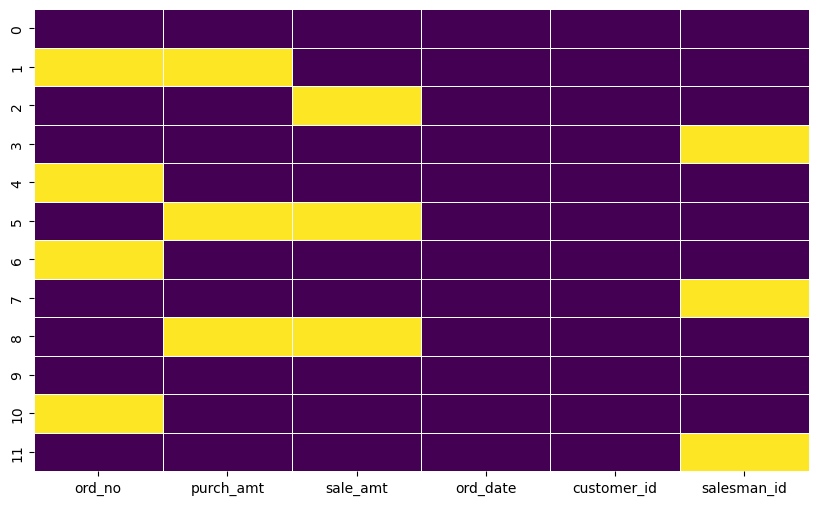

In [235]:
plt.figure(figsize=(10, 6))

# Create the heatmap
sns.heatmap(m, cmap='viridis', cbar=False, linewidths=0.5)
